In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import alexnet.transforms as transforms
import alexnet.data as data
import matplotlib.pyplot as plt
import matplotlib
import random

/home/gchapero/alexnet/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Transforms showcase

Notebook showcasing all the image transforms used in the AlexNet paper.

## Preliminaries

In [3]:
dataset = data.ImageNet("../data", "train")

def show_images(*imgs:list[torch.Tensor]) -> matplotlib.figure.Figure:
    assert len(imgs) > 1
    individual_width = 4
    max_fig_width = 16
    fig, axs = plt.subplots(1, len(imgs), figsize=(min(max_fig_width, individual_width * len(imgs)), max_fig_width))
    axs[0].set_title("original")
    axs[1].set_title("transformed ->")
    for ax, img in zip(axs, imgs):
        ax.imshow(img)

## Resize
Next following transforms will be applied to resized images

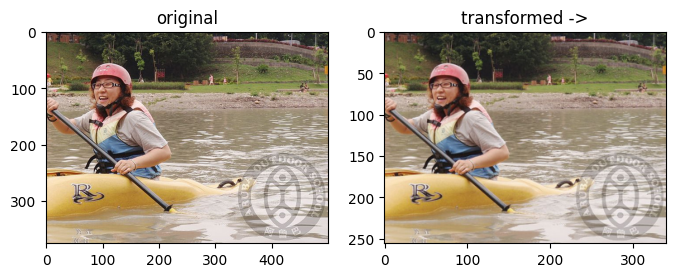

In [5]:
image = random.choice(dataset).image
transform = transforms.Resize(256)
show_images(image, transform(image))

# CenterCrop

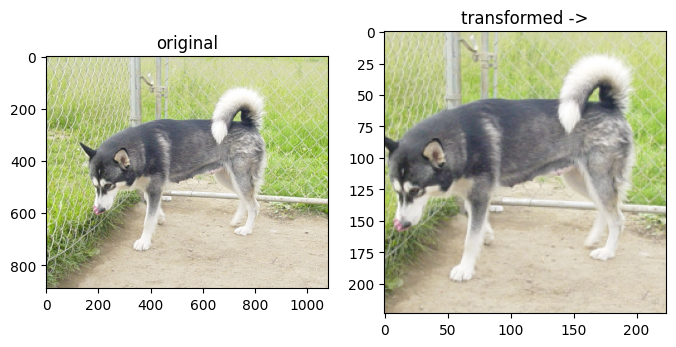

In [6]:
image = random.choice(dataset).image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
])
show_images(image, transform(image))

## RandomCrop

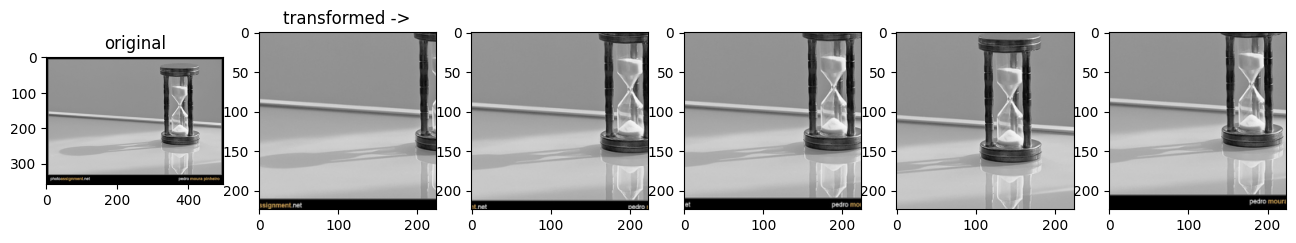

In [5]:
image = random.choice(dataset).image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
])
show_images(image, *[transform(image) for _ in range(5)])

## RandomHorizontalFlip


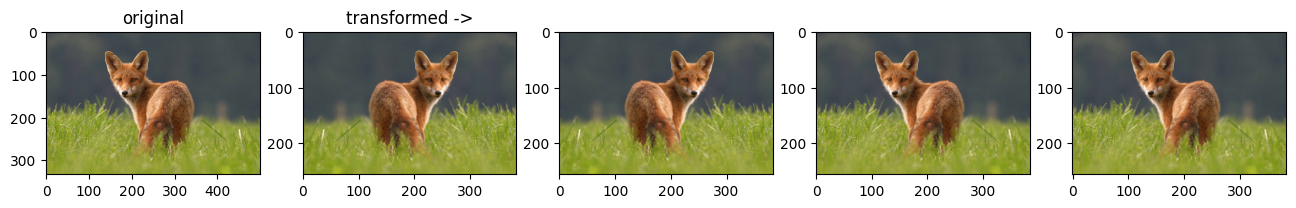

In [10]:
image = random.choice(dataset).image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
])
show_images(image, *[transform(image) for _ in range(4)])

## TenCrop

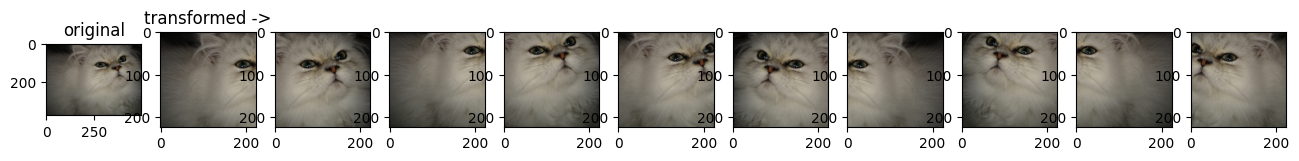

In [7]:
image = random.choice(dataset).image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.TenCrop(224),
])
show_images(image, *transform(image))

## PCAAugment

Note that I implemented PCAAugment and it only applies to tensors, hence `ToTensor`.

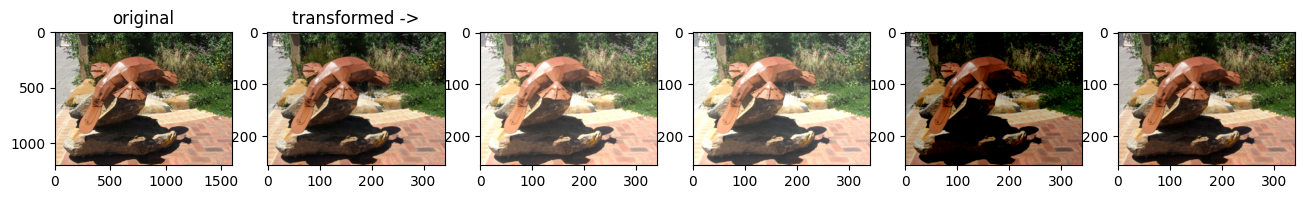

In [15]:
image = random.choice(dataset).image
import torchvision
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.PCAAugment(),
    transforms.ToPILImage(),
])
show_images(image, *[transform(image) for _ in range(5)])